1    4898
0    1599
Name: type, dtype: int64


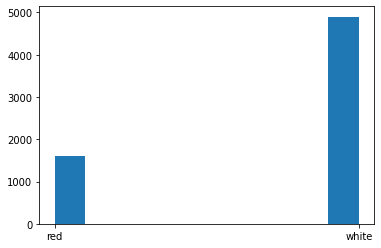

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_53 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_54 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

#와인 데이터셋 불러오기
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
#red와 white의 두 데이터 프레임으로 분리되어있기 떄문에 반드시 두 데이터 프레임을 하나로 합쳐주어야 한다.
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])

#white와 red 데이터 각각의 개수및 수치를 확인해 보아야 한다.
plt.hist(wine['type'])
plt.xticks([0,1], labels = ('red', 'white'))
print(wine['type'].value_counts())
plt.show()

#red wine데이터가 더 3배가량 더 많기 때문에 비슷한 비율로 들어갈 수 있도록 랜덤하게 섞어야 한다.
#그 전에 print(wine.info())를 진행해서 구성 정보의 속성을 파악해서 일치해야만 정규화를 진행할 수 있다.
#아래 코드처럼 정규화를 진행해도 되지만 to_categorical()을 이용해도 된다.
#단 to_categorical()을 이용할 떄의 주의 사항은 .shuffle을 하기 위해서는 pandas dataset로 바꿔주어야 한다는 것이다.
wine_norm = (wine-wine.min()) / (wine.max()-wine.min())   #원-핫인코딩의 다른 방법
#wine_data = tf.keras.utils.to_categorical(wine)
#wine_data = pd.DataFrame(wine_data.reshape(37247301//13,13))
#frac = 1이기 때문에 데이터의 전부를 샘플 데이터로 이용하기 위해 섞는다
wine_shuffle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np)*0.8)
train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y  = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_y = tf.keras.utils.to_categorical(train_y, num_classes = 2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes = 2)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=48, activation = 'relu', input_shape = (12,)))
model.add(tf.keras.layers.Dense(units=24, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=12, activation = 'relu'))
#마지막 레이어의 unit값을, 즉 뉴런의 수를 2로 설정해서 원-핫인코딩으로 변환한 정답의 차원의 수와 동일하게 해야 한다.
model.add(tf.keras.layers.Dense(units = 2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

In [30]:
history = model.fit(train_x, train_y, epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8253 - val_loss: 0.1583 - val_accuracy: 0.9746
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9856 - val_loss: 0.0650 - val_accuracy: 0.9815
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9874 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9910 - val_loss: 0.0626 - val_accuracy: 0.9831
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.0603 - val_accuracy: 0.9846
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9913 - val_loss: 0.0511 - val_accuracy: 0.9869
Epoch 

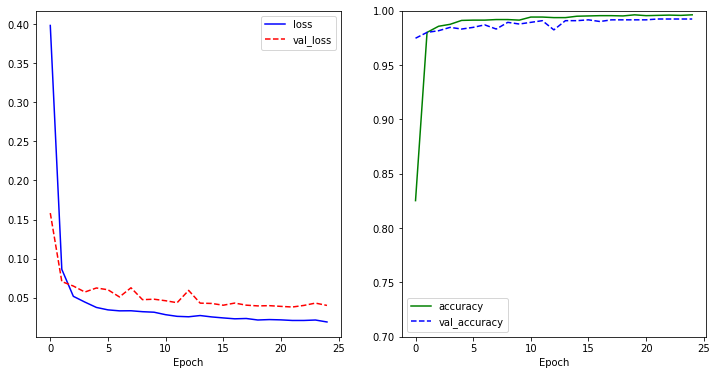

In [32]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'b--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

In [33]:
model.evaluate(test_x, test_y)

41/41 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9900


[0.0389213003218174, 0.9900000095367432]